In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
data=pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
data['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [7]:
data.isna().sum()

Category    0
Resume      0
dtype: int64

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re
from nltk.corpus import stopwords

In [10]:
def clean_text(text):
    text=text.lower()
    text = re.sub(r'(http|https|ftp|ssh)://[^\s]+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text=re.sub(r'[^a-zA-Z0-9]',' ',text)
    text = re.sub(r'\s+', ' ', text).strip()
    words=text.split()
    words=[word for word in words if not word in set(stopwords.words('English'))]
    text=' '.join(words)
    return text

In [11]:
data['Resume']=data['Resume'].apply(clean_text)

In [12]:
data.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 may 2017 b e uit rg...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [15]:
def get_pos(word):
    tag=nltk.pos_tag([word])[0][1][0].upper()
    tag_dict={
        'J':wordnet.ADJ,
        'N':wordnet.NOUN,
        'V':wordnet.VERB,
        'R':wordnet.ADV
    }
    return tag_dict.get(tag,wordnet.NOUN)

lemmatizer=WordNetLemmatizer()    
def data_lemmatize(text):
    words=text.split()
    words=[lemmatizer.lemmatize(word,get_pos(word)) for word in words]
    text=' '.join(words)
    return text

In [16]:
data['Resume']=data['Resume'].apply(data_lemmatize)

In [17]:
data.head()

,Category,Resume
0,Data Science,skill program language python panda numpy scip...
1,Data Science,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,area interest deep learn control system design...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
X=data.drop('Category',axis=1)
y=data['Category']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
label_enc=LabelEncoder()
y_train_enc=label_enc.fit_transform(y_train)

In [22]:
y_test_enc=label_enc.transform(y_test)

In [23]:
y_train_enc[:5]

array([ 2, 23, 19, 24, 16])

### After observing the dataset we can say that TF-IDF should be the best approach for vectorization of the text words because using advanced vectorization approaches can add noise and cost high computation and time so we are approaching TF-IDF for this problem statement.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tv=TfidfVectorizer(max_features=2000,ngram_range=(1,2))
X_train_vec=tv.fit_transform(X_train['Resume'])
X_test_vec=tv.transform(X_test['Resume'])

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model=MultinomialNB(alpha=0.5)
model.fit(X_train_vec,y_train_enc)

,alpha,0.5
,force_alpha,True
,fit_prior,True
,class_prior,None


In [28]:
model.score(X_test_vec,y_test_enc)

0.9637305699481865

In [29]:
y_preds=model.predict(X_test_vec)

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [31]:
metrics={
    "Accuracy_Score":accuracy_score(y_test_enc,y_preds),
    "Precision_Score":precision_score(y_test_enc,y_preds,average="macro"),
    "Recall_Score":recall_score(y_test_enc,y_preds,average="macro")
}

In [32]:
metrics

{'Accuracy_Score': 0.9637305699481865,
 'Precision_Score': 0.976952380952381,
 'Recall_Score': 0.9495238095238094}

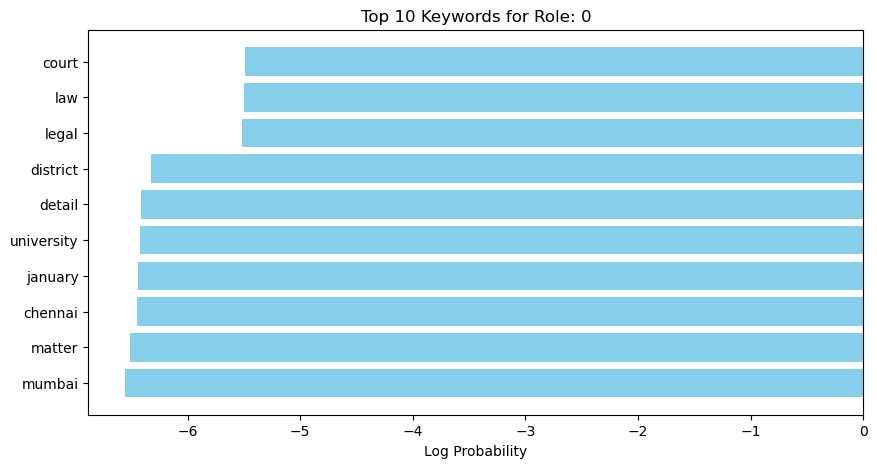

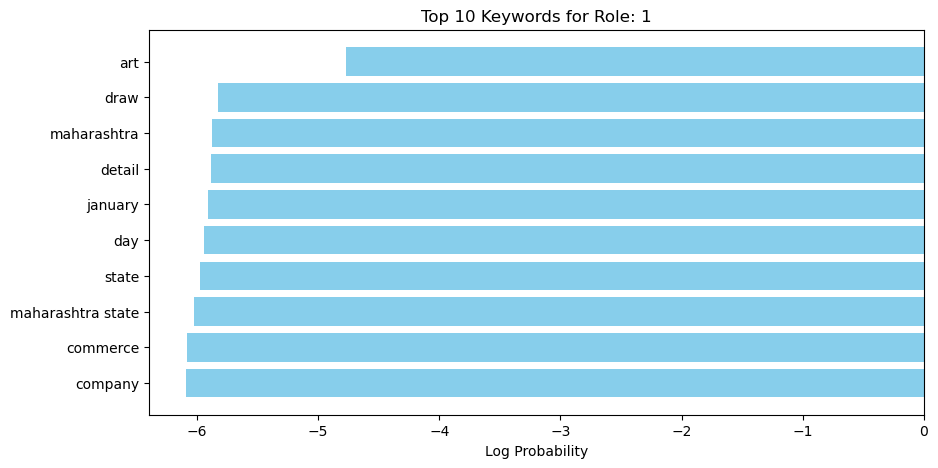

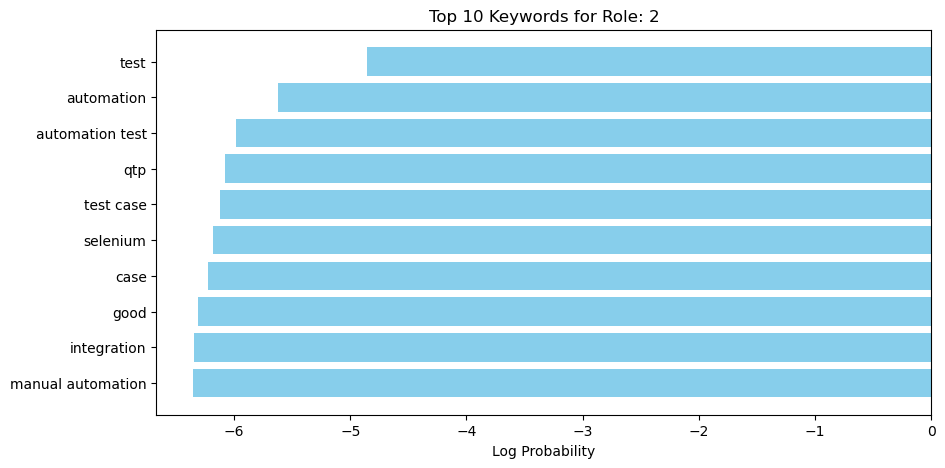

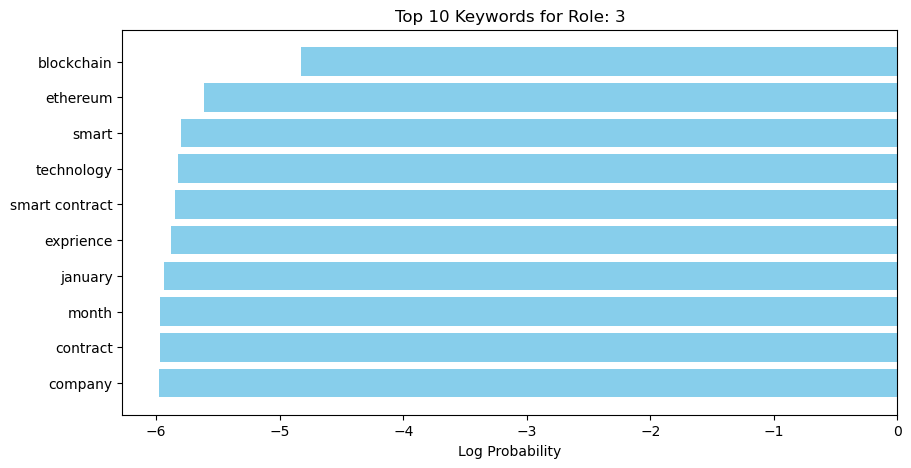

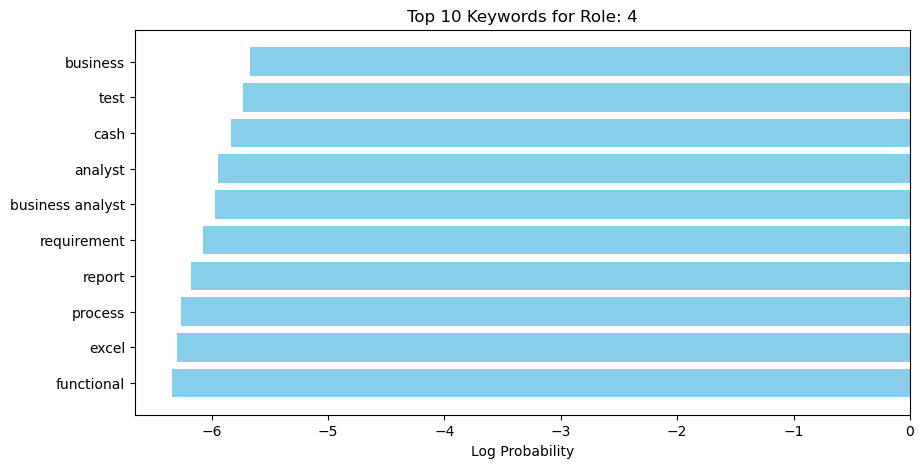

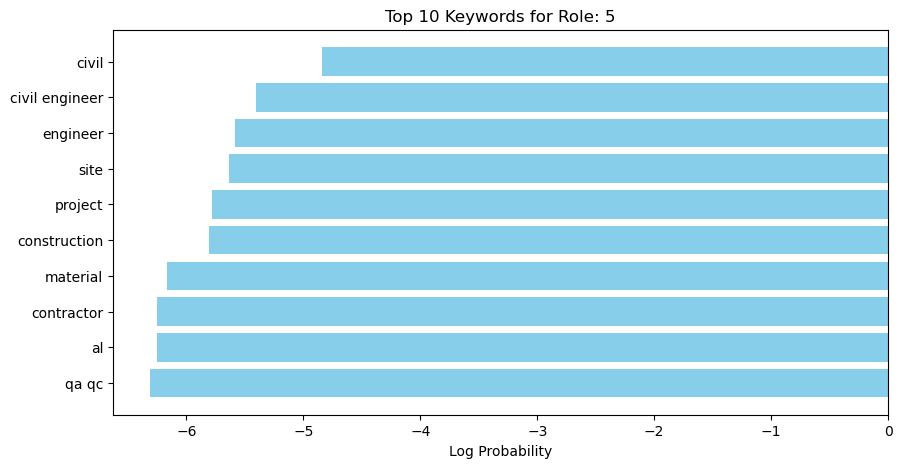

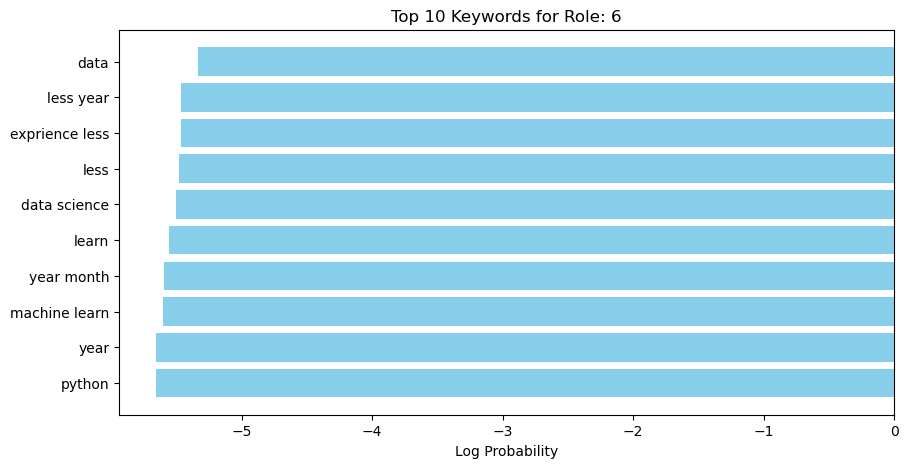

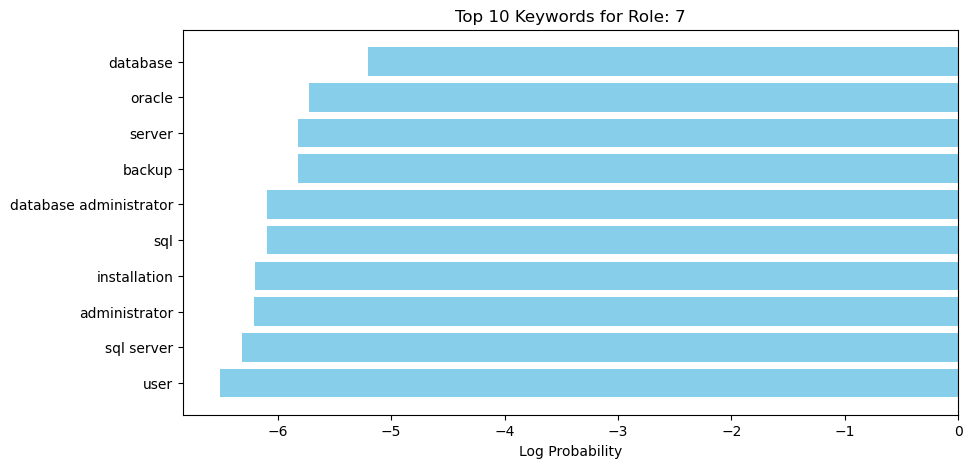

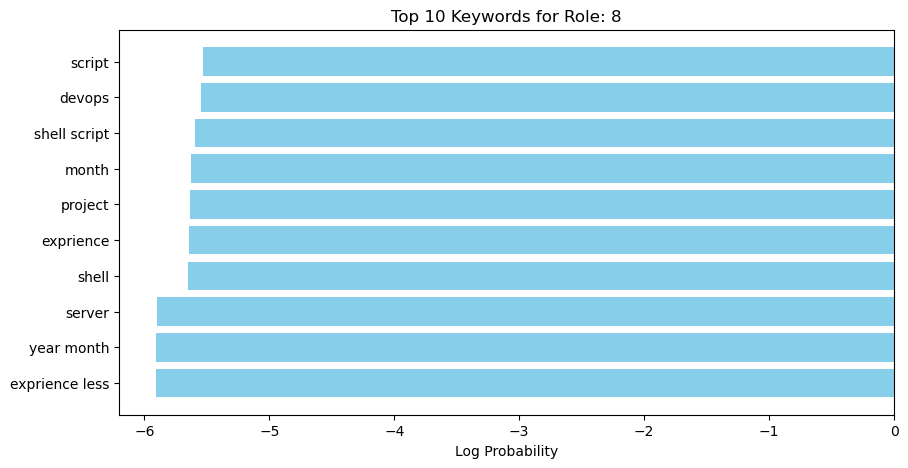

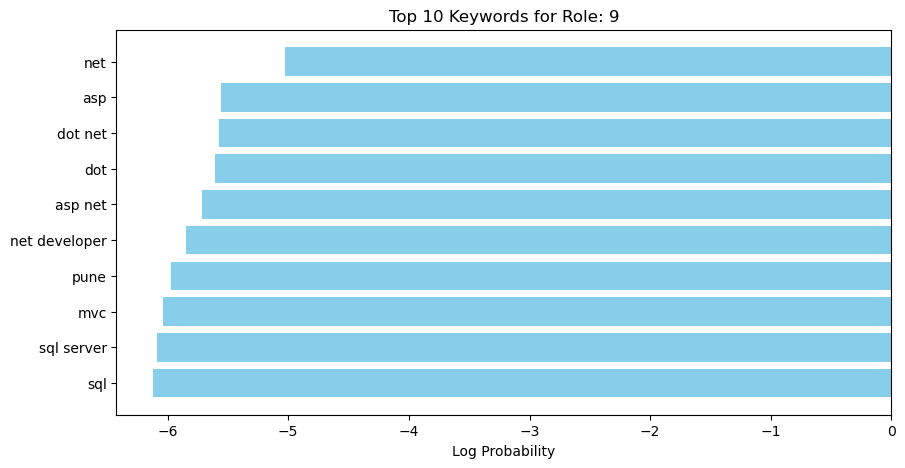

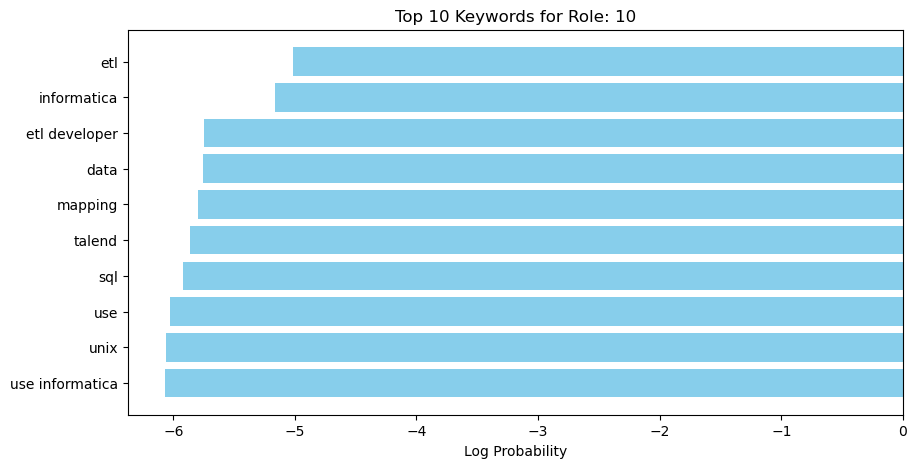

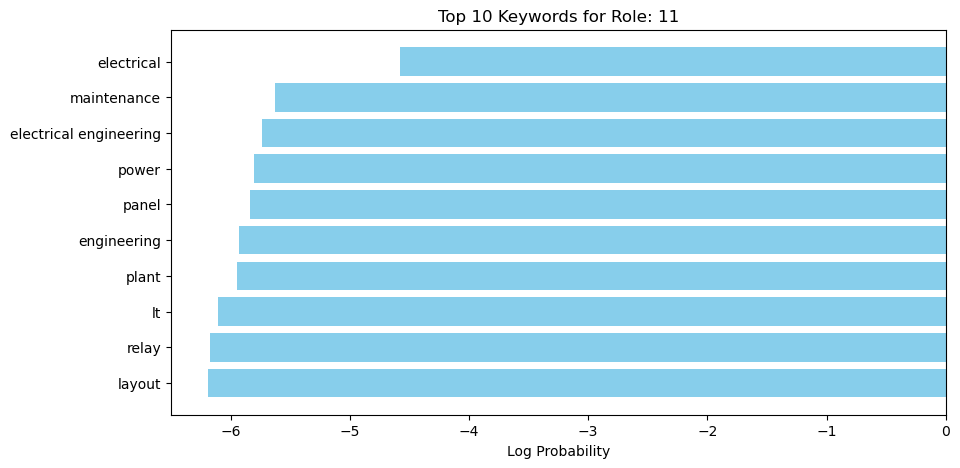

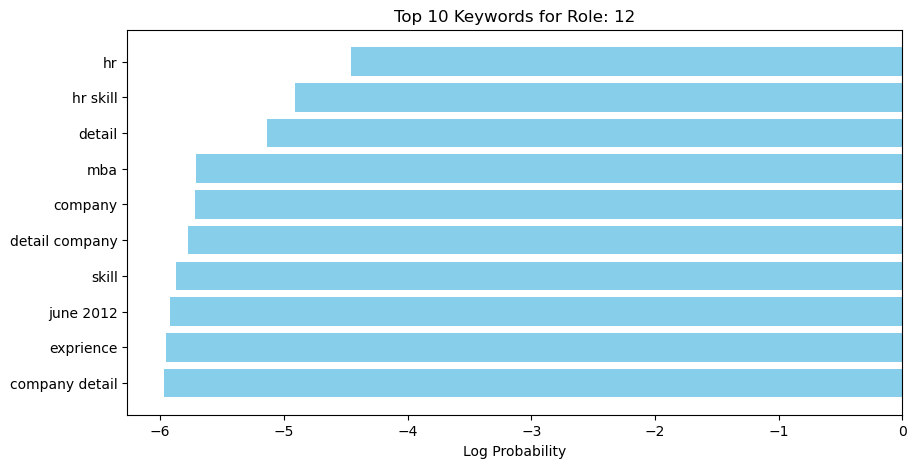

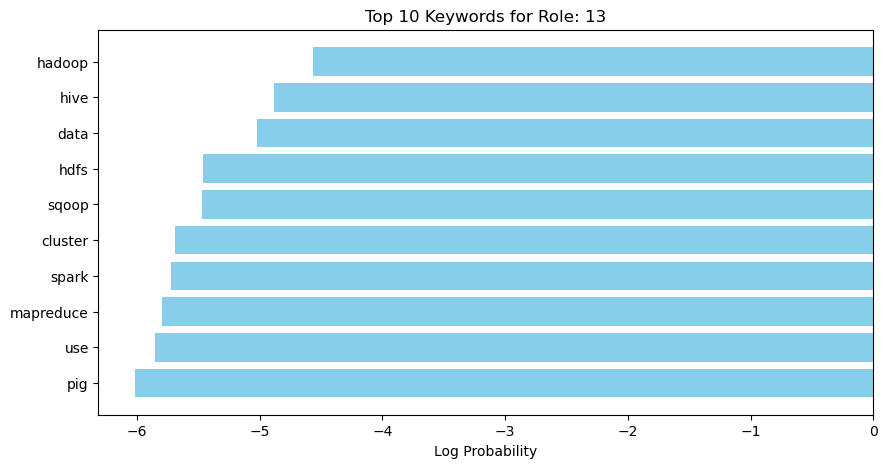

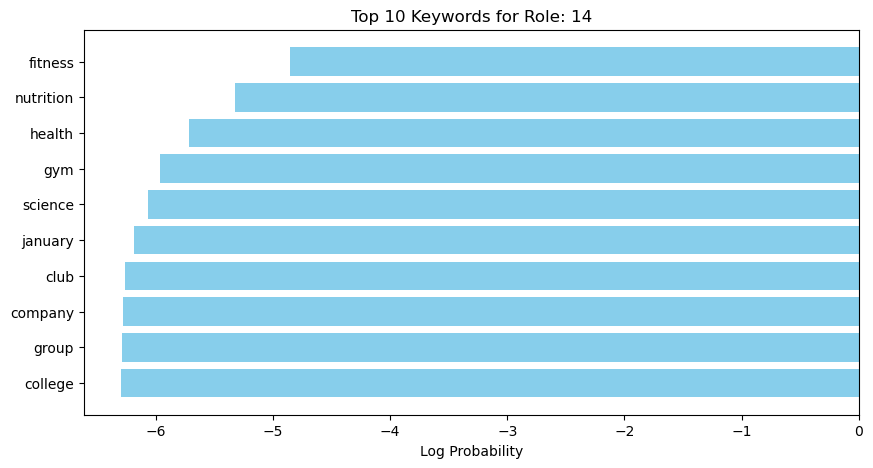

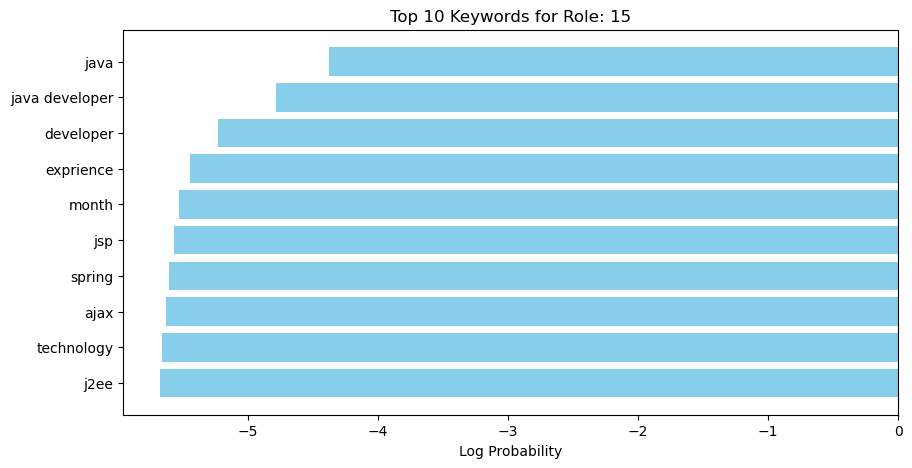

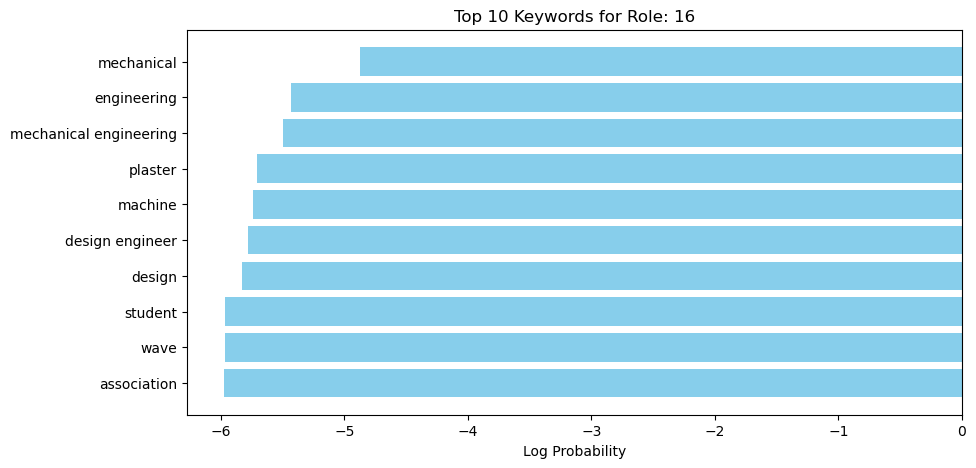

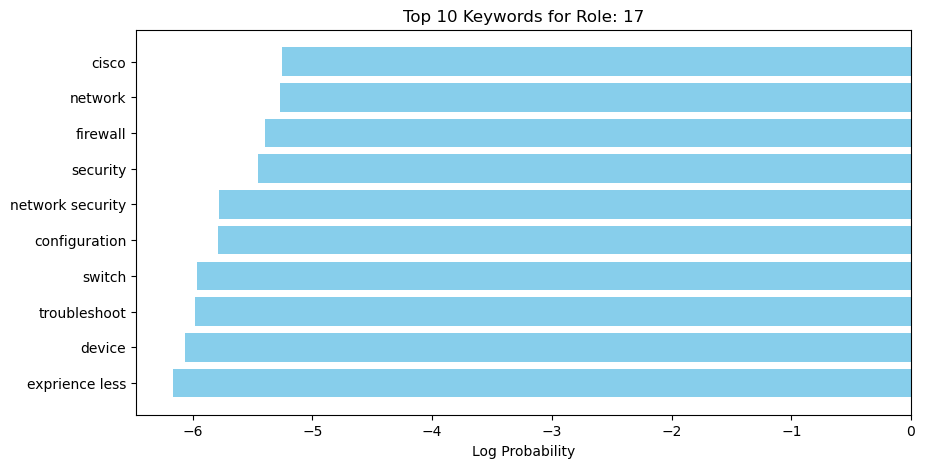

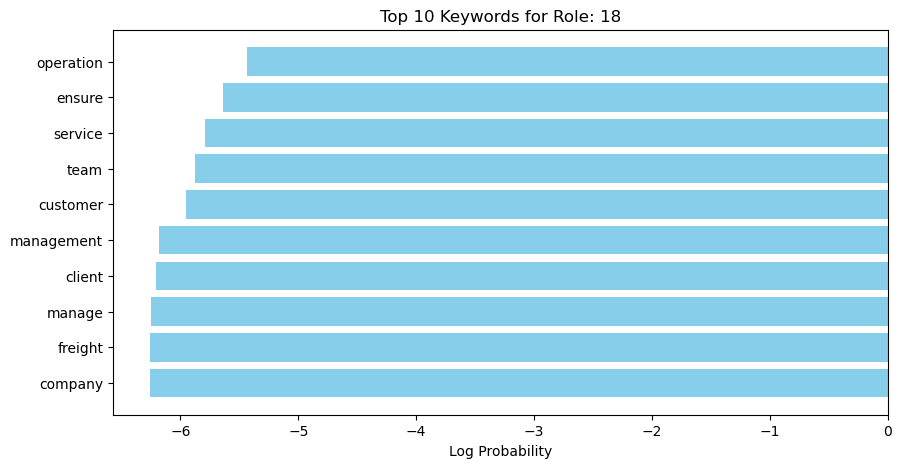

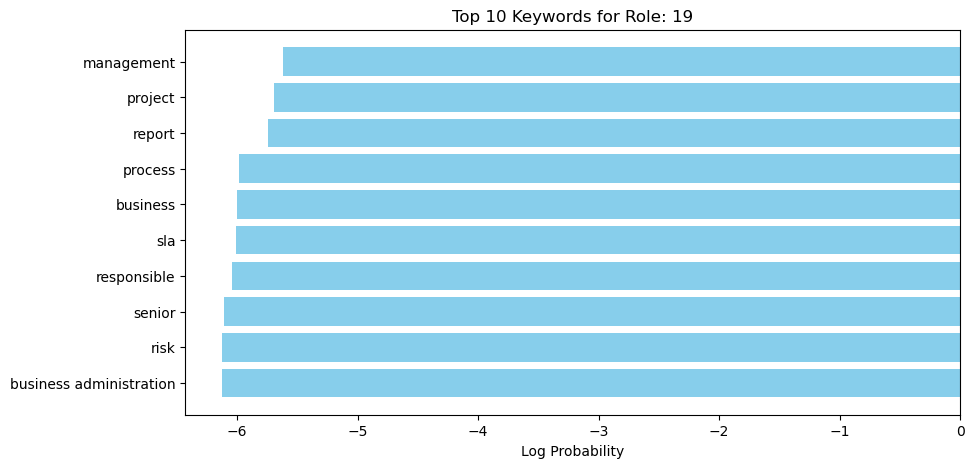

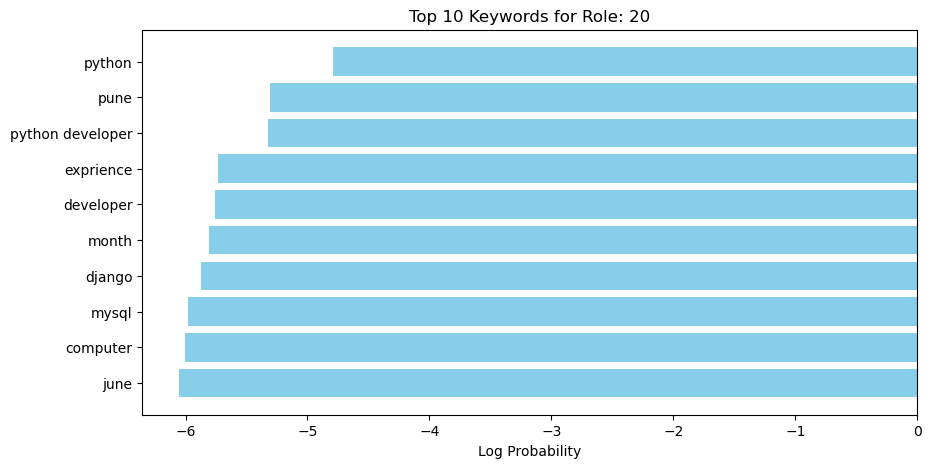

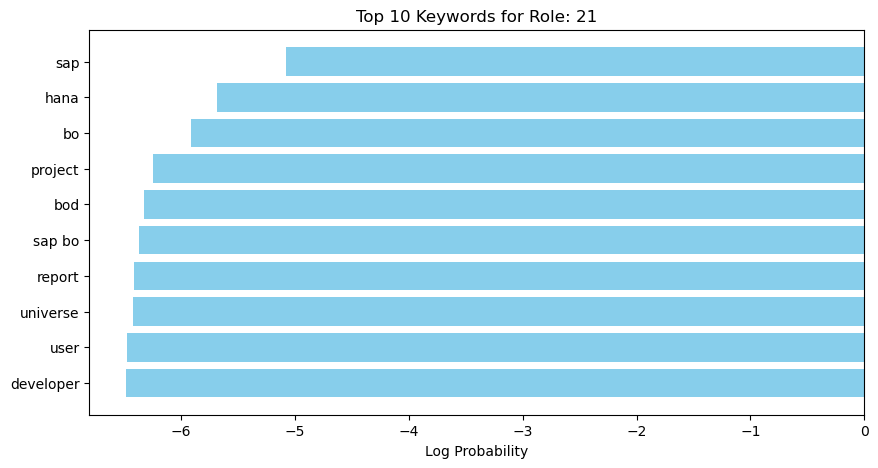

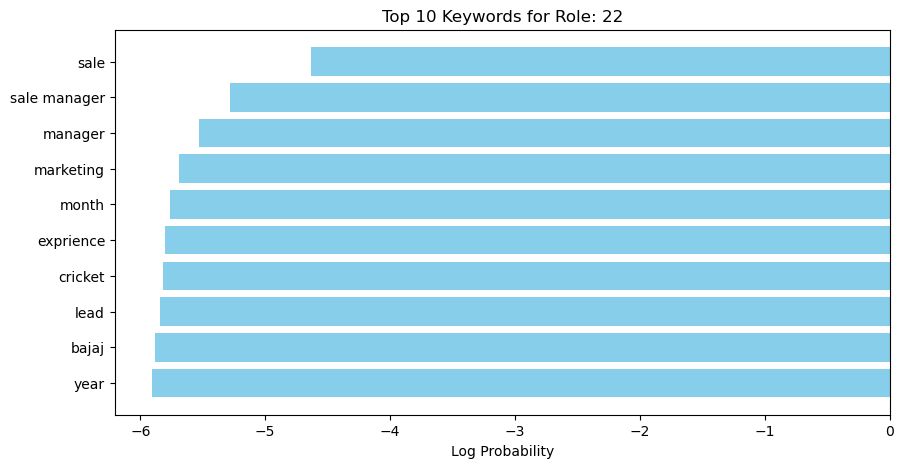

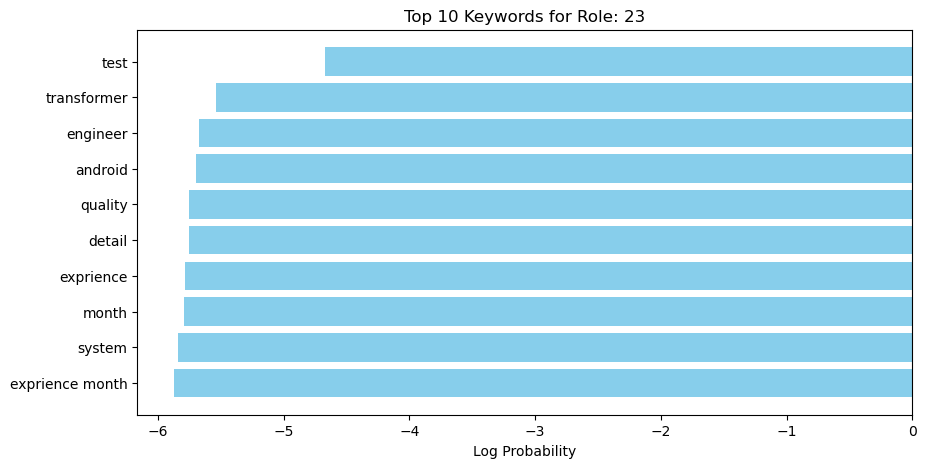

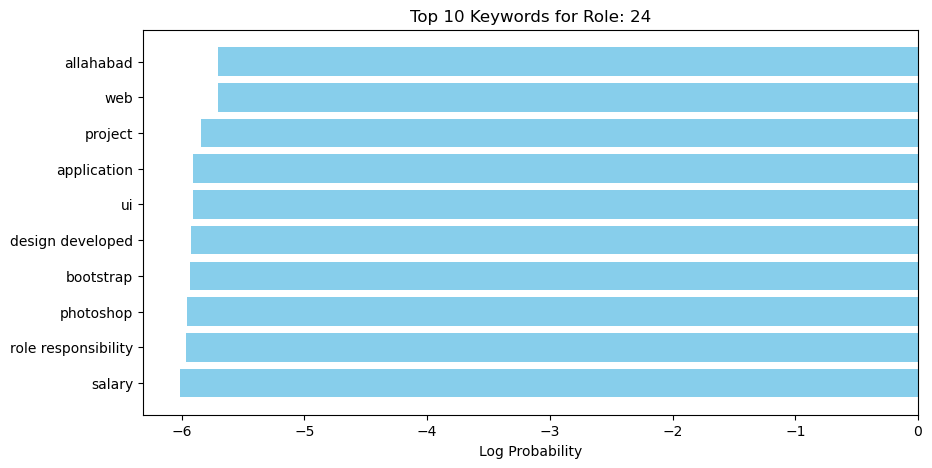

In [33]:
import matplotlib.pyplot as plt
feature_names = tv.get_feature_names_out()  
log_probs = model.feature_log_prob_ 
classes = model.classes_
top_n = 10
for i, cls in enumerate(classes):
    top_idx = np.argsort(log_probs[i])[::-1][:top_n]
    top_features = feature_names[top_idx]
    top_values = log_probs[i][top_idx]
    plt.figure(figsize=(10,5))
    plt.barh(top_features[::-1], top_values[::-1], color='skyblue')  
    plt.xlabel('Log Probability')
    plt.title(f'Top {top_n} Keywords for Role: {cls}')
    plt.show()


In [34]:
y_preds_names=label_enc.inverse_transform(y_preds)

In [35]:
y_preds_names

array(['Network Security Engineer', 'Sales', 'Database', 'Java Developer',
       'Hadoop', 'Electrical Engineering', 'Operations Manager',
       'DevOps Engineer', 'Data Science', 'Web Designing',
       'Health and fitness', 'ETL Developer', 'DevOps Engineer',
       'Mechanical Engineer', 'Database', 'ETL Developer',
       'Operations Manager', 'Operations Manager', 'Civil Engineer',
       'Database', 'Database', 'Java Developer', 'Hadoop',
       'DevOps Engineer', 'Testing', 'Operations Manager',
       'Python Developer', 'Operations Manager', 'Testing', 'Database',
       'Python Developer', 'Web Designing', 'Web Designing',
       'Java Developer', 'Data Science', 'Data Science', 'Hadoop',
       'DevOps Engineer', 'Arts', 'Testing', 'DevOps Engineer',
       'Civil Engineer', 'ETL Developer', 'Advocate', 'Sales', 'HR',
       'Operations Manager', 'Sales', 'DevOps Engineer', 'Hadoop',
       'Electrical Engineering', 'Health and fitness', 'HR',
       'Web Designing', 'Java

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test_enc,y_preds)

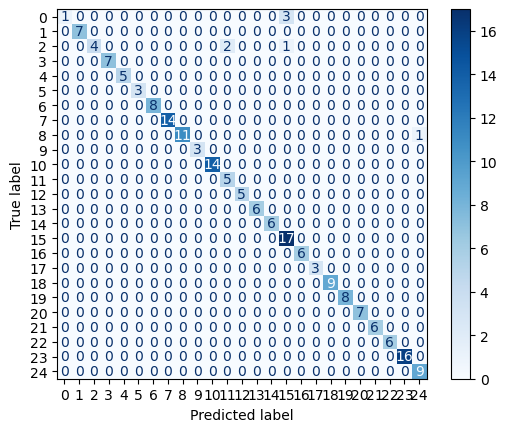

<Figure size 1200x2000 with 0 Axes>

In [37]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.figure(figsize=(12,20))
plt.show()

In [38]:
import joblib

In [39]:
joblib.dump(model,"role_predictor_model.pkl")
joblib.dump(tv,"tfidf_vectorizer.pkl")
joblib.dump(label_enc,"label_encoder.pkl")

['label_encoder.pkl']